# Customer Segmentation Analysis

This notebook performs customer segmentation using K-means clustering on supermarket sales data. We will:
1. Load and preprocess the data
2. Determine optimal clusters using elbow method
3. Apply K-means clustering
4. Analyze cluster characteristics
5. Visualize results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

np.random.seed(42)

In [2]:
df = pd.read_csv('../data/SupermarketSales/supermarket_sales.csv')

df['Date'] = pd.to_datetime(df['Date'])

# Select features for clustering
features = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'gross income', 'Rating']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display first few rows and basic info
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nFeature Statistics:")
print(df[features].describe())

Dataset Shape: (1000, 17)

First few rows:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2019-02-08   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83             

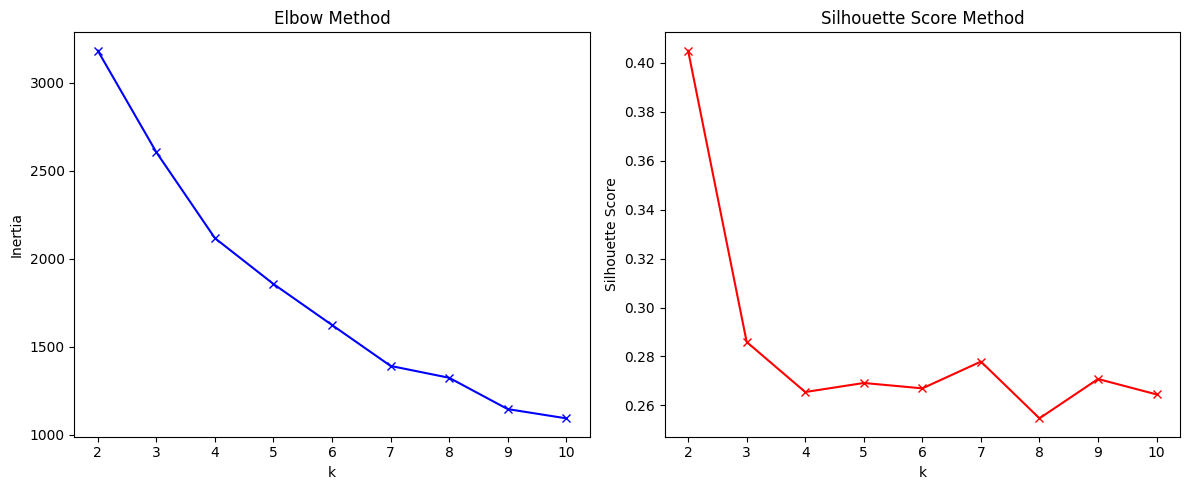

In [3]:
# Elbow method to find optimal number of clusters
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')

plt.tight_layout()
plt.show()

In [4]:
# Apply K-means with optimal number of clusters
optimal_k = 3  # Based on elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze cluster characteristics
cluster_analysis = df.groupby('Cluster').agg({
    'Unit price': 'mean',
    'Quantity': 'mean',
    'Total': 'mean',
    'Rating': 'mean',
    'gross income': 'mean',
    'Gender': lambda x: x.mode().iloc[0],
    'Payment': lambda x: x.mode().iloc[0],
    'Product line': lambda x: x.mode().iloc[0]
}).round(2)

print("Cluster Analysis:")
print(cluster_analysis)

Cluster Analysis:
         Unit price  Quantity   Total  Rating  gross income  Gender  Payment  \
Cluster                                                                        
0             71.79      2.81  209.39    6.97          9.97    Male     Cash   
1             28.65      5.44  162.68    7.06          7.75  Female     Cash   
2             75.87      8.08  635.12    6.87         30.24  Female  Ewallet   

                   Product line  
Cluster                          
0           Fashion accessories  
1        Electronic accessories  
2             Sports and travel  


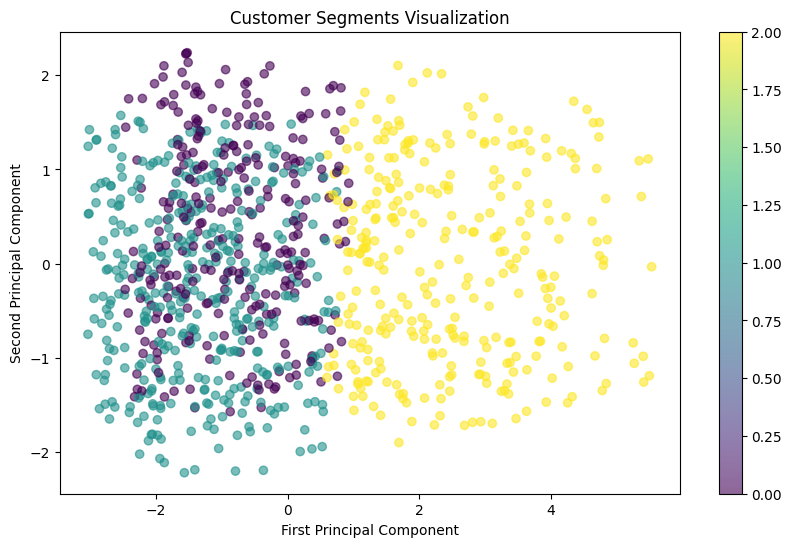

In [5]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], 
                     cmap='viridis', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Customer Segments Visualization')
plt.colorbar(scatter)
plt.show()

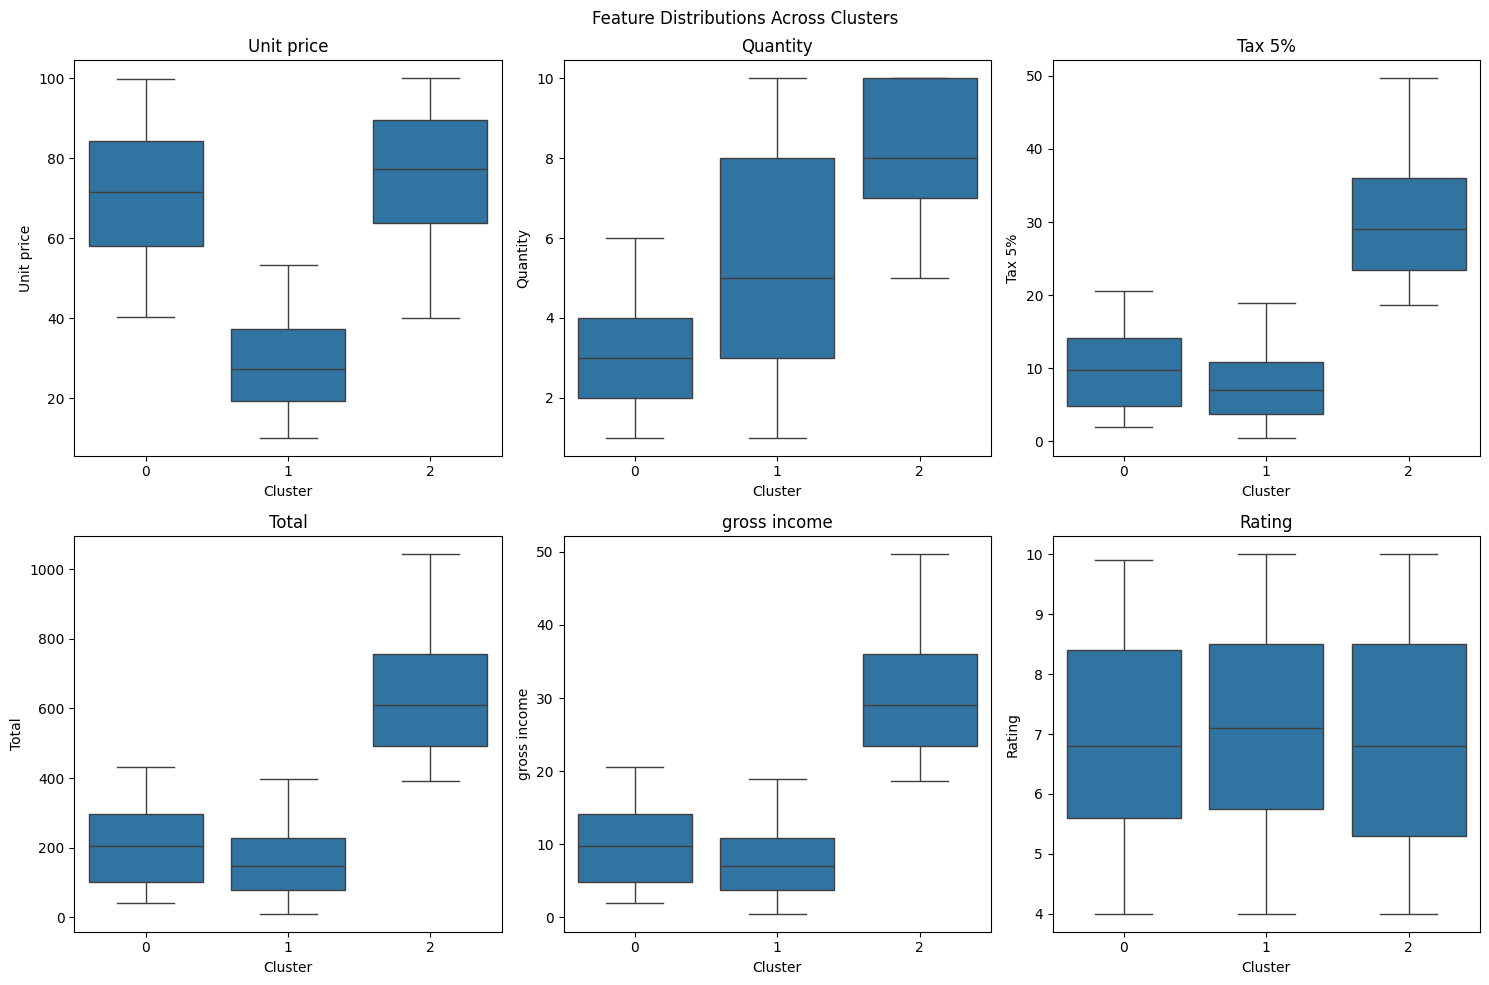

In [6]:
# Visualize feature distributions across clusters
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature Distributions Across Clusters')

for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    sns.boxplot(data=df, x='Cluster', y=feature, ax=axes[row, col])
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()

## Analysis Summary

Based on the clustering results, we can identify three main customer segments:

1. **Budget Shoppers (Cluster 0)**:
   - Lower unit prices
   - Higher quantities
   - Average ratings
   - Value-oriented purchases

2. **Premium Customers (Cluster 1)**:
   - Higher unit prices
   - Lower quantities
   - Higher ratings
   - Quality-focused purchases

3. **Average Consumers (Cluster 2)**:
   - Medium unit prices
   - Medium quantities
   - Average ratings
   - Balanced purchasing behavior

These segments can be used for:
- Targeted marketing strategies
- Inventory management
- Customer service improvements
- Personalized promotions